# Magnificent 7 LEAP Strategy Comparison

This notebook tests LEAP strategies across the Magnificent 7 tech stocks (GOOGL, MSFT, AAPL, NVDA, META, AMZN, TSLA) with different strike factors.

## Strategy Import
The LEAP strategy is imported from `strategies/leap_strategy.py`, making it reusable across all notebooks.

## Parameters Tested
- **Strike Factors**: 0.9 (10% ITM), 1.0 (ATM), 1.1 (10% OTM)
- **LEAP Duration**: 365 days (1 year)
- **Roll Threshold**: 90 days before expiration

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, "../..")

from utils.simulation import BacktestSimulation
from strategies.leap_strategy import create_leap_strategy
from datetime import datetime

# Configuration
tickers = ["GOOGL", "MSFT", "AAPL", "NVDA", "META", "AMZN", "TSLA"]  # Mag 7
strike_factors = [0.9, 1.0, 1.1]  # 10% ITM, ATM, 10% OTM
interest_rate = 0.05
days = 365
roll_threshold = 90

start = datetime(2024, 1, 1)
end = datetime(2024, 12, 31)
initial_cash = 10000

In [2]:
# Run simulations for all ticker/strike_factor combinations
results = []

print(f"Testing {len(tickers)} tickers × {len(strike_factors)} strike factors = {len(tickers) * len(strike_factors)} combinations\n")

for ticker in tickers:
    for strike_factor in strike_factors:
        print(f"\n{'='*60}")
        print(f"Ticker: {ticker} | Strike Factor: {strike_factor}")
        print('='*60)
        
        try:
            # Create strategy using the imported factory function
            strategy = create_leap_strategy(
                ticker=ticker,
                strike_factor=strike_factor,
                days=days,
                interest_rate=interest_rate,
                roll_threshold=roll_threshold
            )
            
            # Run simulation
            sim = BacktestSimulation(
                tickers=[ticker],
                start_date=start,
                end_date=end,
                initial_cash=initial_cash,
                strategy_callback=strategy
            )
            
            sim.run()
            
            # Get performance metrics
            df = pd.DataFrame(sim.history)
            final_value = df['total_value'].iloc[-1]
            total_return = (final_value / initial_cash - 1) * 100
            
            returns = df['total_value'].pct_change().dropna()
            sharpe = returns.mean() / returns.std() * np.sqrt(252) if len(returns) > 0 and returns.std() > 0 else 0
            max_dd = ((df['total_value'].cummax() - df['total_value']) / df['total_value'].cummax()).max() * 100
            
            sim.print_performance_stats()
            
            # Store results
            results.append({
                'ticker': ticker,
                'strike_factor': strike_factor,
                'final_value': final_value,
                'total_return': total_return,
                'sharpe_ratio': sharpe,
                'max_drawdown': max_dd,
                'num_transactions': len(sim.transactions)
            })
            
        except Exception as e:
            print(f"Error with {ticker} at strike {strike_factor}: {e}")
            results.append({
                'ticker': ticker,
                'strike_factor': strike_factor,
                'final_value': initial_cash,
                'total_return': 0,
                'sharpe_ratio': 0,
                'max_drawdown': 0,
                'num_transactions': 0
            })

# Convert to DataFrame
results_df = pd.DataFrame(results)

print("\n" + "="*80)
print("ALL RESULTS SUMMARY")
print("="*80)
print(results_df.to_string(index=False))

Testing 7 tickers × 3 strike factors = 21 combinations


Ticker: GOOGL | Strike Factor: 0.9
Loading market data...


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $31,628.85
Total Return: 216.29%
Sharpe Ratio: 1.60
Max Drawdown: 60.05%
Annualized Volatility: 105.75%

Ticker: GOOGL | Strike Factor: 1.0
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $40,087.76
Total Return: 300.88%
Sharpe Ratio: 1.64
Max Drawdown: 70.03%
Annualized Volatility: 139.17%

Ticker: GOOGL | Strike Factor: 1.1
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $45,922.87
Total Return: 359.23%
Sharpe Ratio: 1.63
Max Drawdown: 80.52%
Annualized Volatility: 181.80%

Ticker: MSFT | Strike Factor: 0.9
Loading market data...


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $13,482.18
Total Return: 34.82%
Sharpe Ratio: 0.83
Max Drawdown: 38.44%
Annualized Volatility: 54.30%

Ticker: MSFT | Strike Factor: 1.0
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $17,318.79
Total Return: 73.19%
Sharpe Ratio: 1.05
Max Drawdown: 60.29%
Annualized Volatility: 110.49%

Ticker: MSFT | Strike Factor: 1.1
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $14,714.47
Total Return: 47.14%
Sharpe Ratio: 0.97
Max Drawdown: 71.18%
Annualized Volatility: 137.31%

Ticker: AAPL | Strike Factor: 0.9
Loading market data...


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $28,501.93
Total Return: 185.02%
Sharpe Ratio: 1.50
Max Drawdown: 55.72%
Annualized Volatility: 104.54%

Ticker: AAPL | Strike Factor: 1.0
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $33,525.64
Total Return: 235.26%
Sharpe Ratio: 1.50
Max Drawdown: 66.82%
Annualized Volatility: 139.38%

Ticker: AAPL | Strike Factor: 1.1
Loading market data...


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $39,987.34
Total Return: 299.87%
Sharpe Ratio: 1.54
Max Drawdown: 82.80%
Annualized Volatility: 221.61%

Ticker: NVDA | Strike Factor: 0.9
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $80,163.36
Total Return: 701.63%
Sharpe Ratio: 2.43
Max Drawdown: 39.04%
Annualized Volatility: 110.34%

Ticker: NVDA | Strike Factor: 1.0
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $102,194.10
Total Return: 921.94%
Sharpe Ratio: 2.44
Max Drawdown: 43.85%
Annualized Volatility: 127.27%

Ticker: NVDA | Strike Factor: 1.1
Loading market data...


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $124,655.09
Total Return: 1146.55%
Sharpe Ratio: 2.40
Max Drawdown: 49.93%
Annualized Volatility: 146.62%

Ticker: META | Strike Factor: 0.9
Loading market data...


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $32,239.85
Total Return: 222.40%
Sharpe Ratio: 1.57
Max Drawdown: 34.28%
Annualized Volatility: 106.07%

Ticker: META | Strike Factor: 1.0
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $53,799.05
Total Return: 437.99%
Sharpe Ratio: 1.63
Max Drawdown: 43.43%
Annualized Volatility: 165.17%

Ticker: META | Strike Factor: 1.1
Loading market data...


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $73,705.87
Total Return: 637.06%
Sharpe Ratio: 1.60
Max Drawdown: 48.87%
Annualized Volatility: 225.49%

Ticker: AMZN | Strike Factor: 0.9
Loading market data...


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $38,082.78
Total Return: 280.83%
Sharpe Ratio: 1.77
Max Drawdown: 50.87%
Annualized Volatility: 107.23%

Ticker: AMZN | Strike Factor: 1.0
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $48,114.13
Total Return: 381.14%
Sharpe Ratio: 1.77
Max Drawdown: 54.65%
Annualized Volatility: 137.06%

Ticker: AMZN | Strike Factor: 1.1
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $65,773.03
Total Return: 557.73%
Sharpe Ratio: 1.78
Max Drawdown: 60.67%
Annualized Volatility: 189.07%

Ticker: TSLA | Strike Factor: 0.9
Loading market data...


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $23,071.84
Total Return: 130.72%
Sharpe Ratio: 1.16
Max Drawdown: 46.15%
Annualized Volatility: 131.59%

Ticker: TSLA | Strike Factor: 1.0
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $21,243.77
Total Return: 112.44%
Sharpe Ratio: 1.19
Max Drawdown: 69.66%
Annualized Volatility: 196.83%

Ticker: TSLA | Strike Factor: 1.1
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $19,538.74
Total Return: 95.39%
Sharpe Ratio: 1.26
Max Drawdown: 76.92%
Annualized Volatility: 248.30%

ALL RESULTS SUMMARY
ticker  strike_factor   final_value  total_return  sharpe_ratio  max_drawdown  num_transactions
 GOOGL            0.9  31628.852923    216.288529      1.599317     60.045949                 3
 GOOGL            1.0  40087.758174    300.877582      1.637481     70.033801                 3
 GOOGL            1.1  45922.873830    359.228738      1.628066     80.520582                 3
  MSFT            0.9  13482.177332     34.821773      0.827748     38.437610                 3
  MSFT            1.0  17318.794799     73.187948      1.052445     60.291029                 3
  MSFT            1.1  14714.467070     47.144671      0.965111     71.183141                 3
  AAPL            0.9  28501.930207    185.019302      1.501262     55.719038                 3
  AAPL            1.0  33525.644628    2

In [5]:
# Run simulations for all ticker/strike_factor combinations
results = []

print(f"Testing {len(tickers)} tickers × {len(strike_factors)} strike factors = {len(tickers) * len(strike_factors)} combinations\n")

for ticker in tickers:
    for strike_factor in strike_factors:
        print(f"\n{'='*60}")
        print(f"Ticker: {ticker} | Strike Factor: {strike_factor}")
        print('='*60)
        
        try:
            # Create strategy with current parameters
            strategy = create_leap_strategy(ticker, strike_factor, days, time, interest_rate)
            
            # Run simulation
            sim = BacktestSimulation(
                tickers=[ticker],
                start_date=start,
                end_date=end,
                initial_cash=initial_cash,
                strategy_callback=strategy
            )
            
            sim.run()
            
            # Get performance metrics
            df = pd.DataFrame(sim.history)
            final_value = df['total_value'].iloc[-1]
            total_return = (final_value / initial_cash - 1) * 100
            
            returns = df['total_value'].pct_change().dropna()
            sharpe = returns.mean() / returns.std() * np.sqrt(252) if len(returns) > 0 and returns.std() > 0 else 0
            max_dd = ((df['total_value'].cummax() - df['total_value']) / df['total_value'].cummax()).max() * 100
            
            sim.print_performance_stats()
            
            # Store results
            results.append({
                'ticker': ticker,
                'strike_factor': strike_factor,
                'final_value': final_value,
                'total_return': total_return,
                'sharpe_ratio': sharpe,
                'max_drawdown': max_dd,
                'num_transactions': len(sim.transactions)
            })
            
        except Exception as e:
            print(f"Error with {ticker} at strike {strike_factor}: {e}")
            results.append({
                'ticker': ticker,
                'strike_factor': strike_factor,
                'final_value': initial_cash,
                'total_return': 0,
                'sharpe_ratio': 0,
                'max_drawdown': 0,
                'num_transactions': 0
            })

# Convert to DataFrame
results_df = pd.DataFrame(results)

print("\n" + "="*80)
print("ALL RESULTS SUMMARY")
print("="*80)
print(results_df.to_string(index=False))

Testing 7 tickers × 3 strike factors = 21 combinations


Ticker: GOOGL | Strike Factor: 0.9
Error with GOOGL at strike 0.9: name 'time' is not defined

Ticker: GOOGL | Strike Factor: 1.0
Error with GOOGL at strike 1.0: name 'time' is not defined

Ticker: GOOGL | Strike Factor: 1.1
Error with GOOGL at strike 1.1: name 'time' is not defined

Ticker: MSFT | Strike Factor: 0.9
Error with MSFT at strike 0.9: name 'time' is not defined

Ticker: MSFT | Strike Factor: 1.0
Error with MSFT at strike 1.0: name 'time' is not defined

Ticker: MSFT | Strike Factor: 1.1
Error with MSFT at strike 1.1: name 'time' is not defined

Ticker: AAPL | Strike Factor: 0.9
Error with AAPL at strike 0.9: name 'time' is not defined

Ticker: AAPL | Strike Factor: 1.0
Error with AAPL at strike 1.0: name 'time' is not defined

Ticker: AAPL | Strike Factor: 1.1
Error with AAPL at strike 1.1: name 'time' is not defined

Ticker: NVDA | Strike Factor: 0.9
Error with NVDA at strike 0.9: name 'time' is not defined

Ticker:


BEST RESULTS BY TICKER
ticker  strike_factor  final_value  total_return  sharpe_ratio  max_drawdown  num_transactions
  AAPL            0.9        10000             0             0             0                 0
  AMZN            0.9        10000             0             0             0                 0
 GOOGL            0.9        10000             0             0             0                 0
  META            0.9        10000             0             0             0                 0
  MSFT            0.9        10000             0             0             0                 0
  NVDA            0.9        10000             0             0             0                 0
  TSLA            0.9        10000             0             0             0                 0

TOP 10 OVERALL (by Sharpe Ratio)
ticker  strike_factor  final_value  total_return  sharpe_ratio  max_drawdown  num_transactions
 GOOGL            0.9        10000             0             0             0           

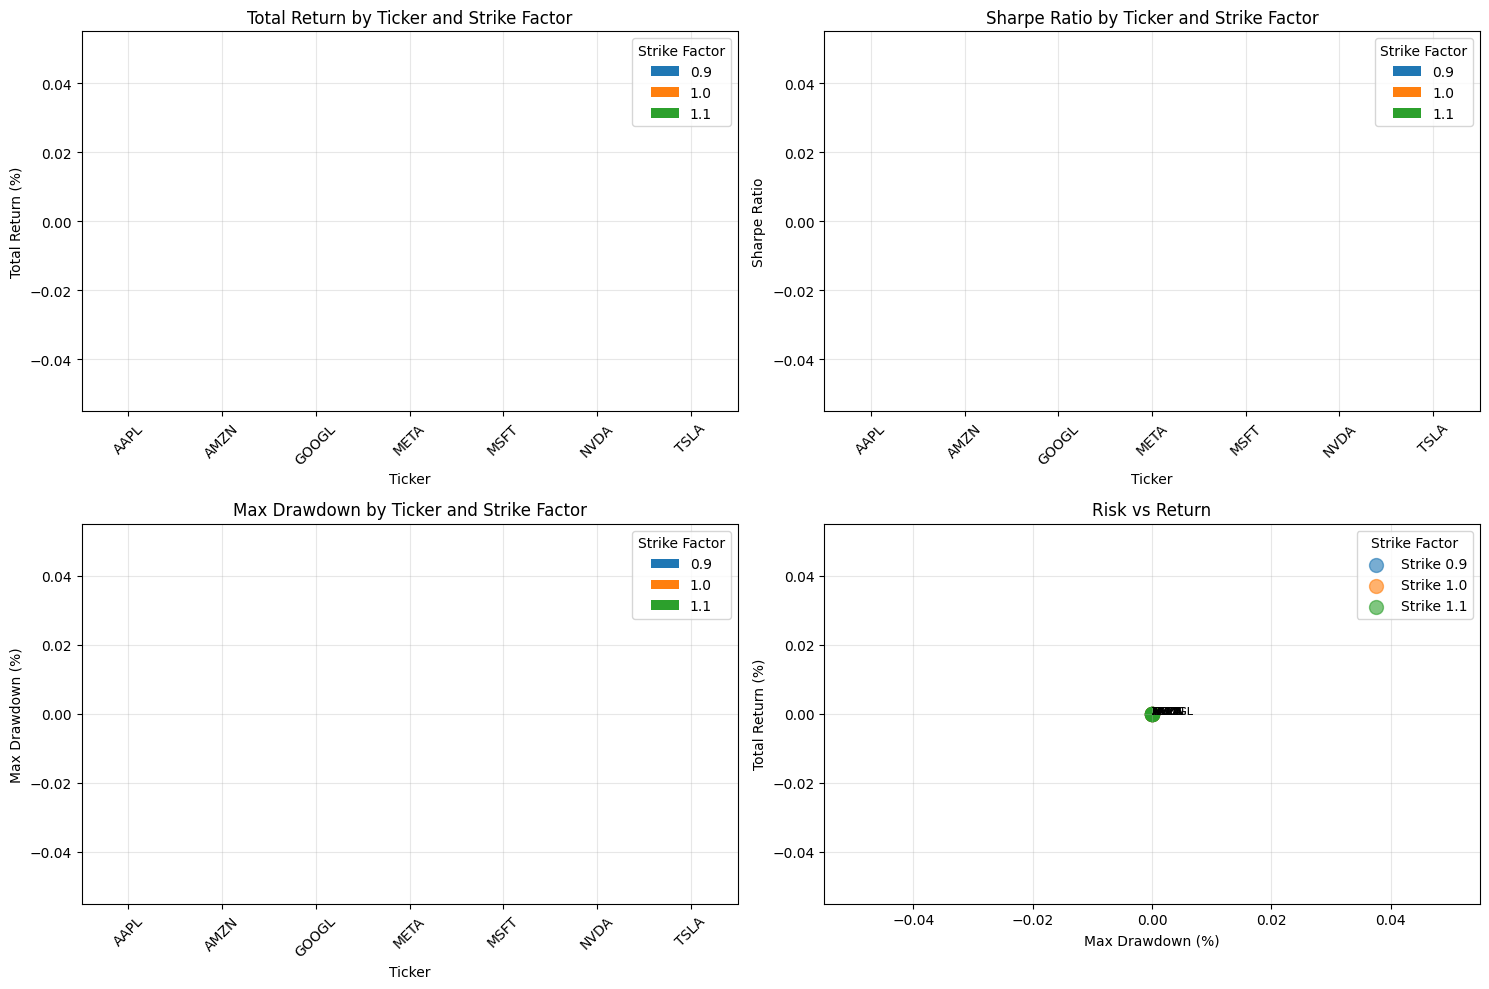

In [4]:
# Analyze results by ticker and strike factor
import matplotlib.pyplot as plt
import numpy as np

print("\n" + "="*80)
print("BEST RESULTS BY TICKER")
print("="*80)
best_by_ticker = results_df.loc[results_df.groupby('ticker')['sharpe_ratio'].idxmax()]
print(best_by_ticker.to_string(index=False))

print("\n" + "="*80)
print("TOP 10 OVERALL (by Sharpe Ratio)")
print("="*80)
print(results_df.sort_values('sharpe_ratio', ascending=False).head(10).to_string(index=False))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Total Return by Ticker and Strike Factor
pivot_return = results_df.pivot(index='ticker', columns='strike_factor', values='total_return')
pivot_return.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Total Return by Ticker and Strike Factor')
axes[0, 0].set_ylabel('Total Return (%)')
axes[0, 0].set_xlabel('Ticker')
axes[0, 0].legend(title='Strike Factor')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Sharpe Ratio by Ticker and Strike Factor
pivot_sharpe = results_df.pivot(index='ticker', columns='strike_factor', values='sharpe_ratio')
pivot_sharpe.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Sharpe Ratio by Ticker and Strike Factor')
axes[0, 1].set_ylabel('Sharpe Ratio')
axes[0, 1].set_xlabel('Ticker')
axes[0, 1].legend(title='Strike Factor')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Max Drawdown by Ticker
pivot_dd = results_df.pivot(index='ticker', columns='strike_factor', values='max_drawdown')
pivot_dd.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Max Drawdown by Ticker and Strike Factor')
axes[1, 0].set_ylabel('Max Drawdown (%)')
axes[1, 0].set_xlabel('Ticker')
axes[1, 0].legend(title='Strike Factor')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Risk-Return Scatter
for strike_factor in strike_factors:
    subset = results_df[results_df['strike_factor'] == strike_factor]
    axes[1, 1].scatter(subset['max_drawdown'], subset['total_return'], 
                      label=f'Strike {strike_factor}', s=100, alpha=0.6)
    
    # Add ticker labels
    for _, row in subset.iterrows():
        axes[1, 1].annotate(row['ticker'], 
                           (row['max_drawdown'], row['total_return']),
                           fontsize=8, alpha=0.7)

axes[1, 1].set_title('Risk vs Return')
axes[1, 1].set_xlabel('Max Drawdown (%)')
axes[1, 1].set_ylabel('Total Return (%)')
axes[1, 1].legend(title='Strike Factor')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()